# Census Income project

# Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv


In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing dataset
df=pd.read_csv("C:\\Users\\diwak\\Downloads\\p3_dataset\\census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
print("There are",df.shape[0],"rows and",df.shape[1],"columns in the dataset.")

There are 32560 rows and 15 columns in the dataset.


In [4]:
#checking null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

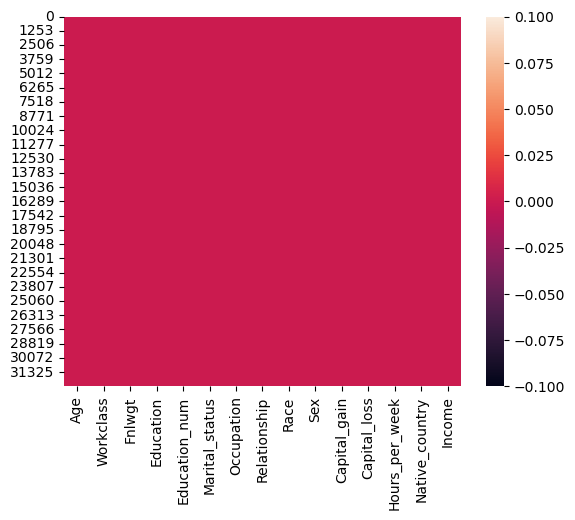

In [5]:
#visualizing null values
sns.heatmap(df.isnull())

There are no null values in the dataset

In [6]:
#Checking duplicate value
df.duplicated().sum()

24

There are 24 duplicate values in the dataset. And as the loss will be very minimum after dropping these 24 values, lets drop these.

In [7]:
#Dropping the duplicate values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Now we are having a dataset free of any duplicates.

# Unique Values

In [8]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype

Here we can see there are certain values having ?, it means the source is unknown, lets analyze further to proceed.

# Description

In [9]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.describe(include="O")

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32536,32536,32536,32536,32536,32536,32536,32536,32536
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27794,21774,29152,24697


From above chart we can see there is huge outliers present in 'capital_gain','capital_loss'. And there are two columns for education both in numeric and categorical. We need to proceed with 1 as both of them are not going to help us predict any better result.
And also there are three almost similar columns 'Marital_status', 'Relationship', 'Sex'. From these three if we keep only the relationship columns then it can give us info about both gender and marital_status. So lets drop the other two.

In [11]:
df.drop(['Marital_status','Sex'],axis=1,inplace=True)

In [12]:
df.drop('Education_num',axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Occupation      32536 non-null  object
 5   Relationship    32536 non-null  object
 6   Race            32536 non-null  object
 7   Capital_gain    32536 non-null  int64 
 8   Capital_loss    32536 non-null  int64 
 9   Hours_per_week  32536 non-null  int64 
 10  Native_country  32536 non-null  object
 11  Income          32536 non-null  object
dtypes: int64(5), object(7)
memory usage: 3.2+ MB


In [14]:
#Separating cat and num col
cat_col=[]
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
    elif df.dtypes[i]!='object':
        num_col.append(i)
    else:
        print("Error")
print("Cat_Col=",cat_col)
print("\n")
print("Num_Col =",num_col)

Cat_Col= ['Workclass', 'Education', 'Occupation', 'Relationship', 'Race', 'Native_country', 'Income']


Num_Col = ['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


# Visualization

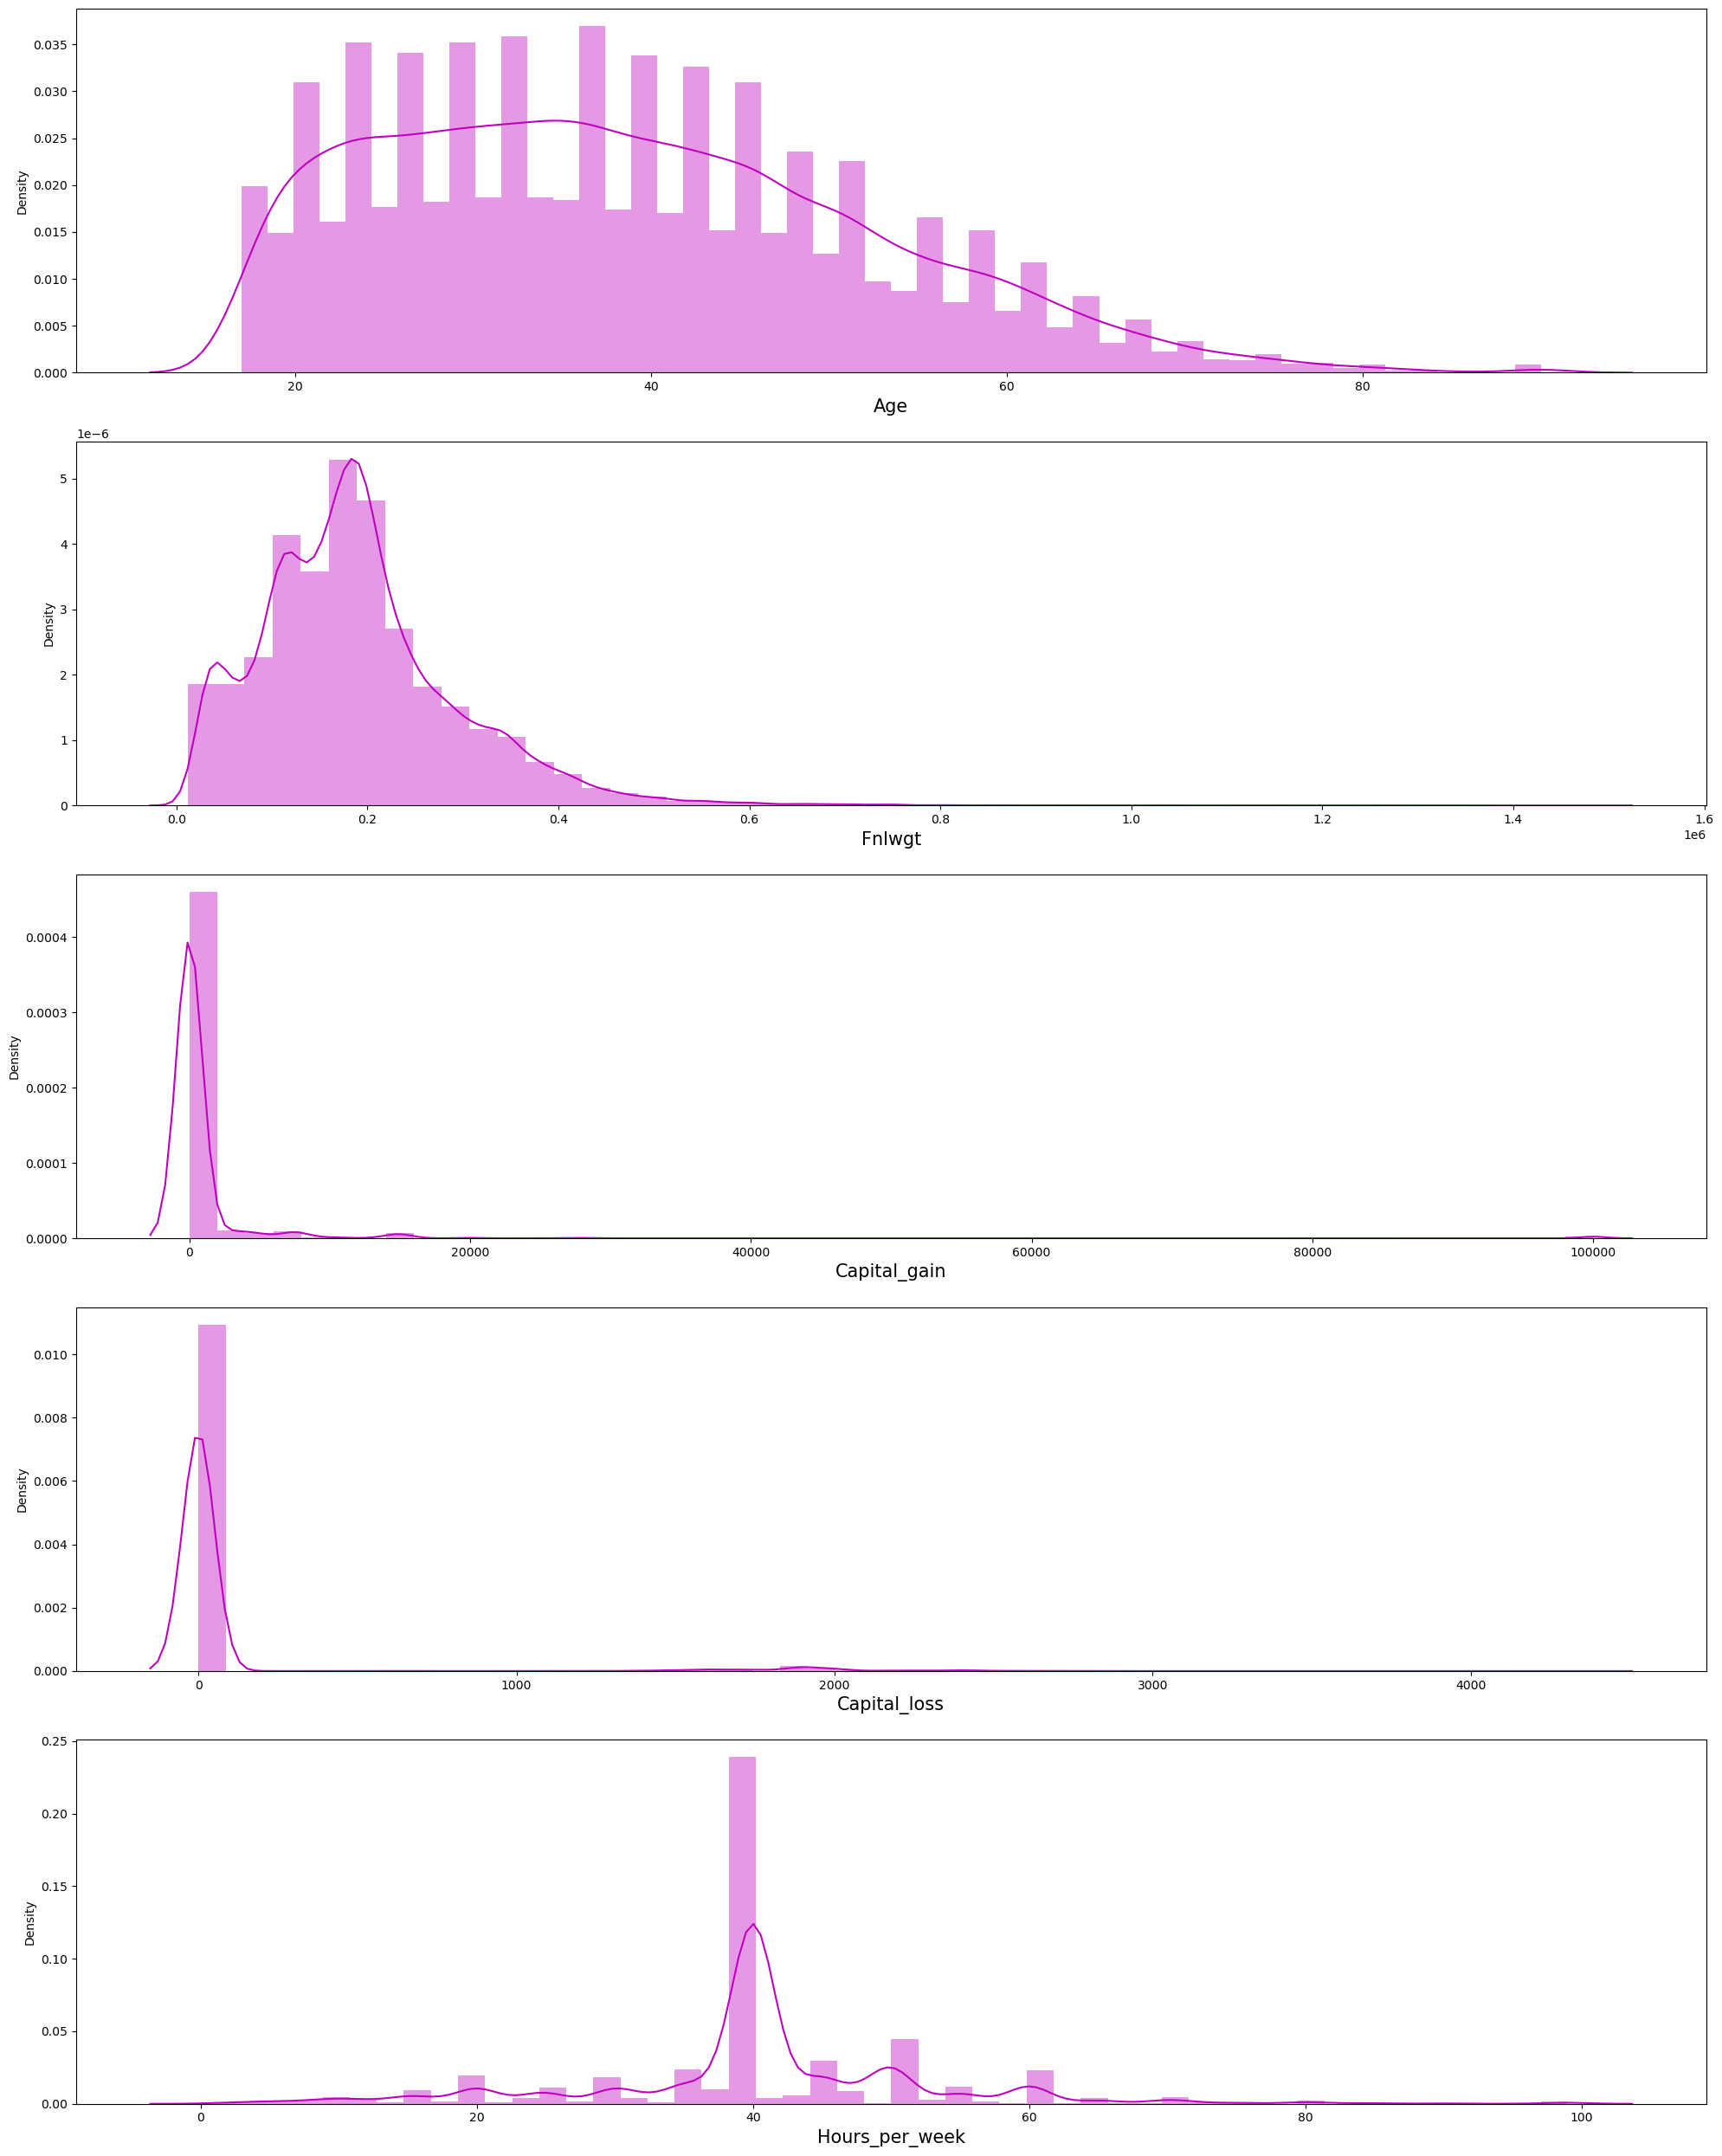

In [15]:
plt.figure(figsize=(20,25))
p=1
for i in num_col:
    if p<=5:
        plt.subplot(5,1,p)
        sns.distplot(df[i],color='m')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

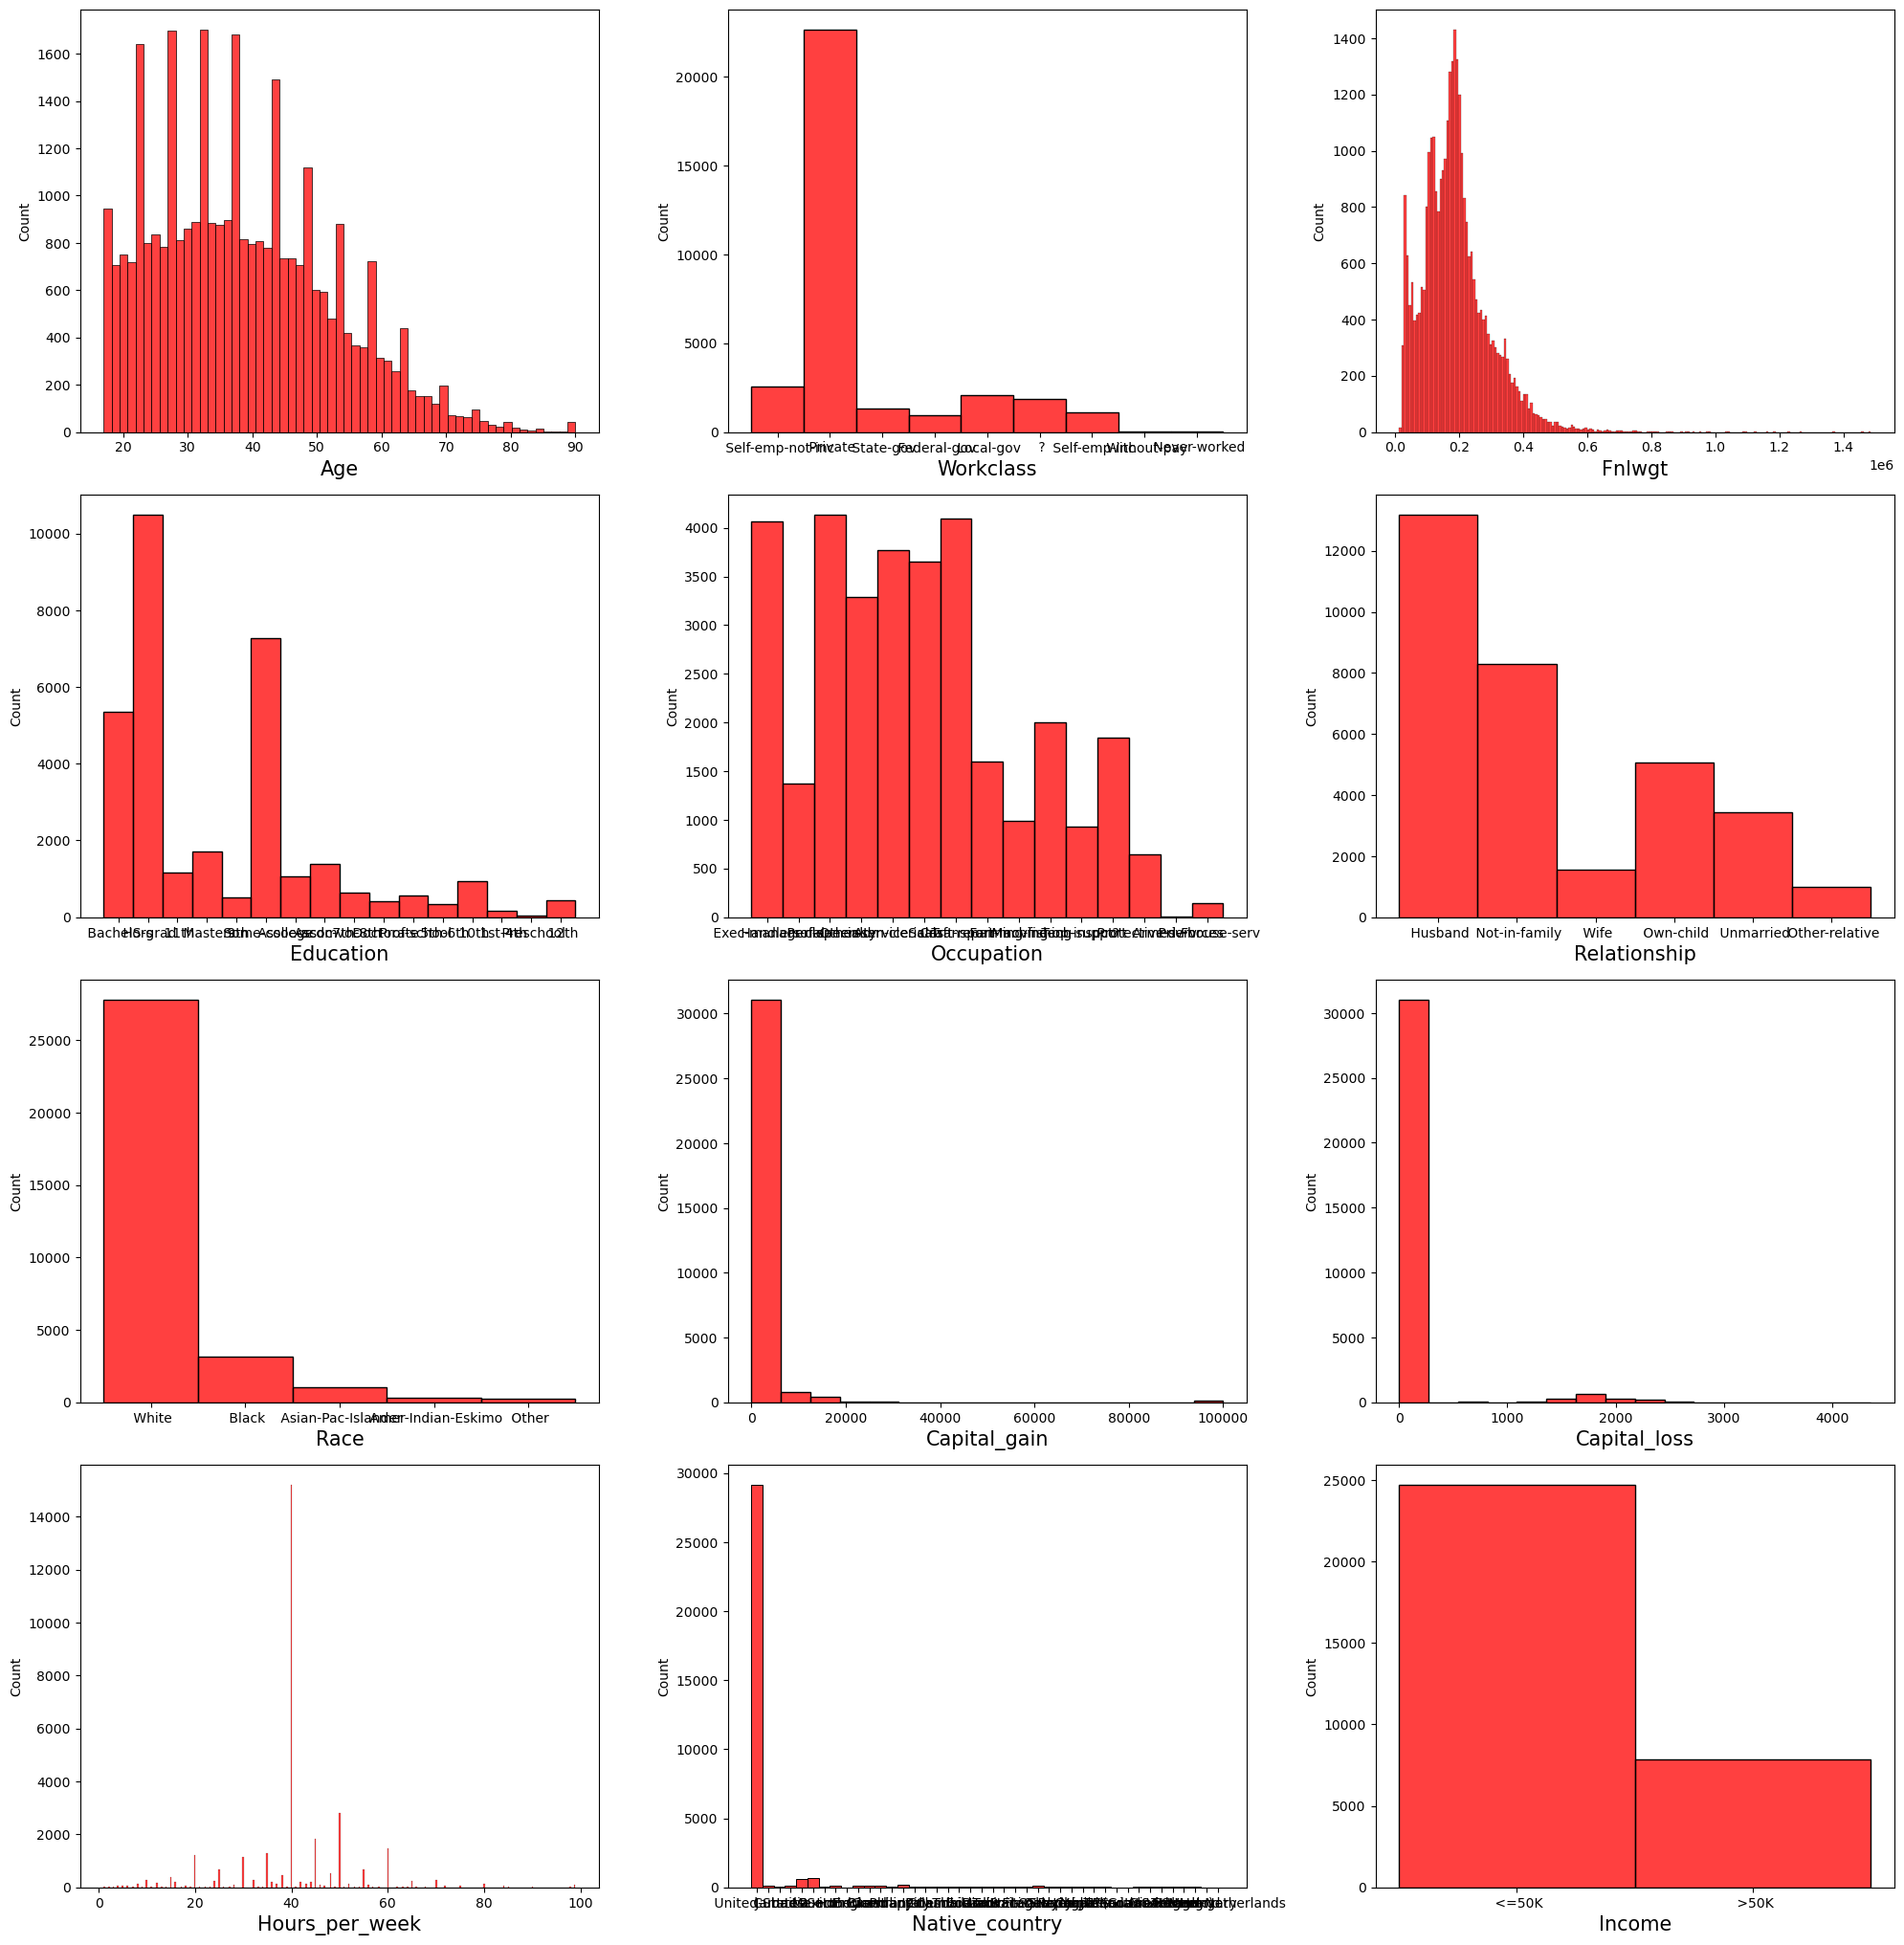

In [16]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=15:
        plt.subplot(5,3,p)
        sns.histplot(df[i],color='red')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

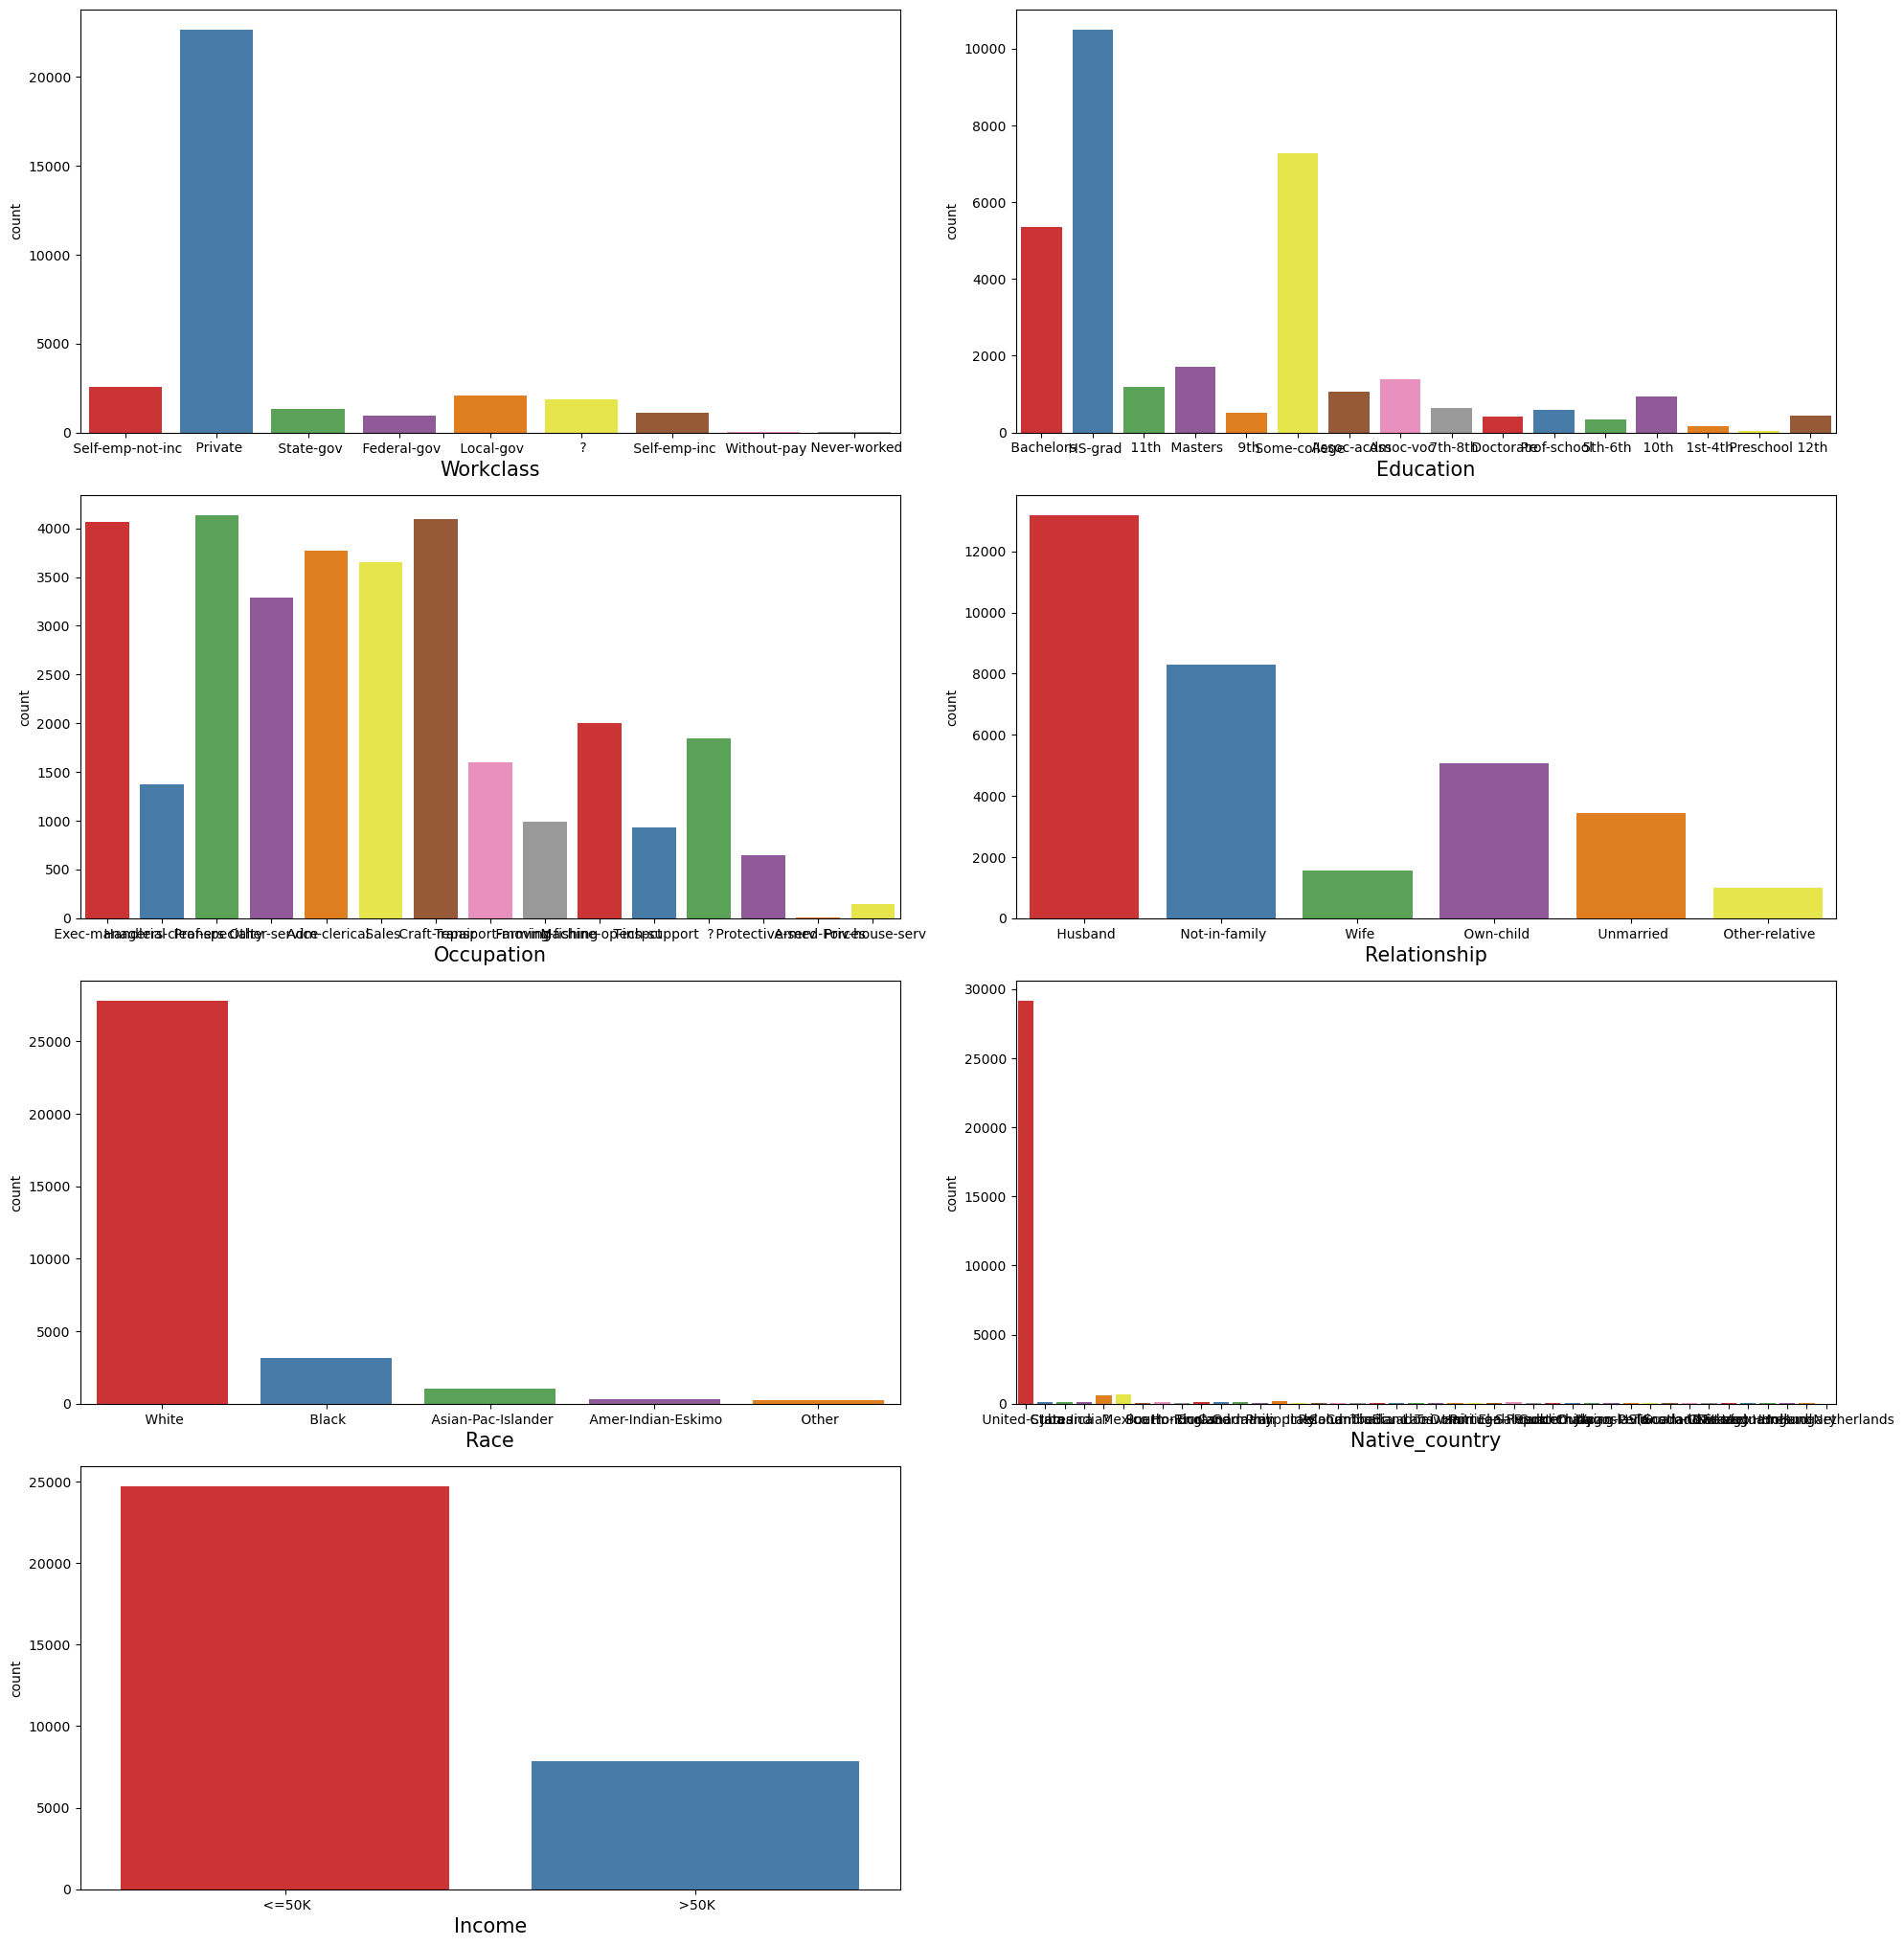

In [17]:
plt.figure(figsize=(20,25))
p=1
for i in cat_col:
    if p<=10:
        plt.subplot(5,2,p)
        sns.countplot(df[i],palette='Set1')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

<AxesSubplot:xlabel='Race', ylabel='count'>

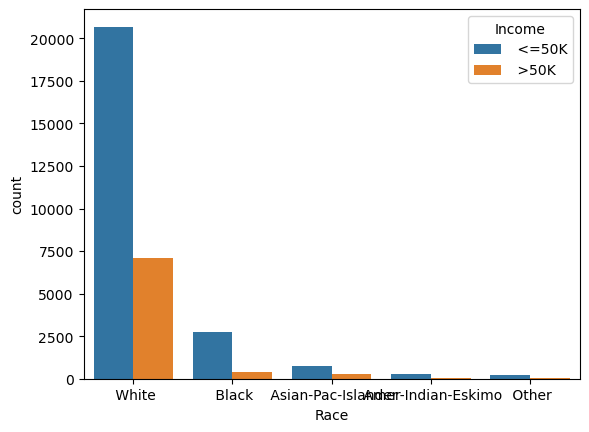

In [18]:
sns.countplot(hue=df.Income,x=df.Race)

<AxesSubplot:xlabel='Income'>

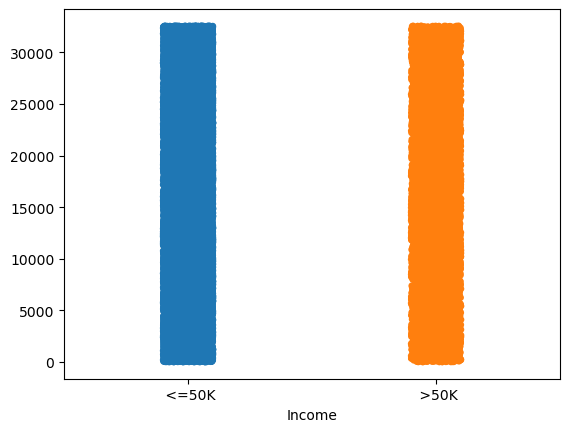

In [19]:
sns.stripplot(x=df.Income,y=df.index)

<AxesSubplot:xlabel='Income', ylabel='Relationship'>

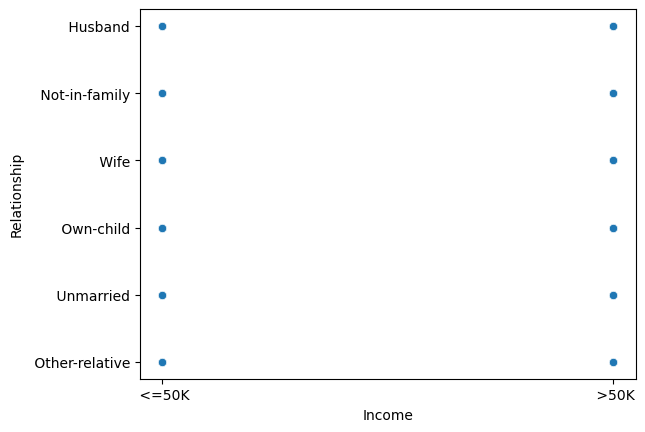

In [20]:
sns.scatterplot(x=df['Income'],y=df.Relationship)

([<matplotlib.patches.Wedge at 0x2aae9a76400>,
 [Text(-0.7996546353035874, 0.7553492332937705, '<=50K'),
  Text(0.7996546353035869, -0.7553492332937709, '>50K')])

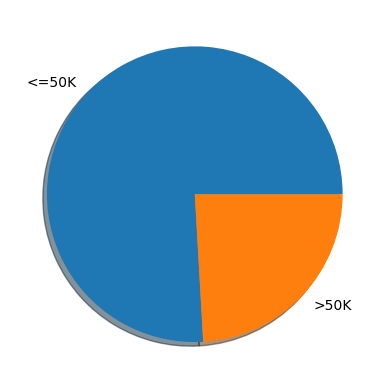

In [21]:
plt.pie(df['Income'].value_counts(),labels=['<=50K','>50K'],shadow=True)

([<matplotlib.patches.Wedge at 0x2aae7d06ac0>,
 [Text(-0.6377506233318267, 0.8962556233797736, 'Private'),
  Text(-0.0973759414441268, -1.0956814893151523, 'Self-emp-not-inc'),
  Text(0.38617430348620246, -1.0299851490807752, 'Local-gov'),
  Text(0.7401598687168772, -0.8137342125909511, '?'),
  Text(0.9489783422456677, -0.5562734093489142, 'State-gov'),
  Text(1.051775035849433, -0.3221323857731845, 'Self-emp-inc'),
  Text(1.0948556587242653, -0.10625952455876875, 'Federal-gov'),
  Text(1.099995980105214, -0.002973844711840557, 'Without-pay'),
  Text(1.0999997488175566, -0.000743371584401754, 'Never-worked')])

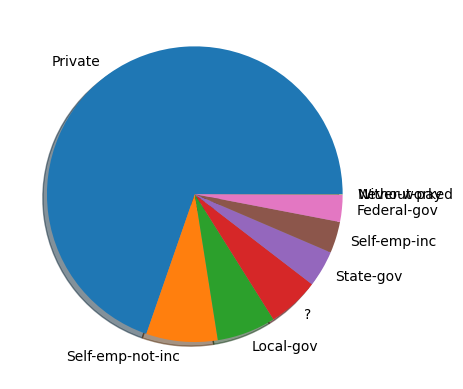

In [22]:
plt.pie(df['Workclass'].value_counts(),labels=['Private','Self-emp-not-inc','Local-gov','?','State-gov','Self-emp-inc',
                                              'Federal-gov','Without-pay','Never-worked'],shadow=True)

<AxesSubplot:xlabel='Fnlwgt', ylabel='Race'>

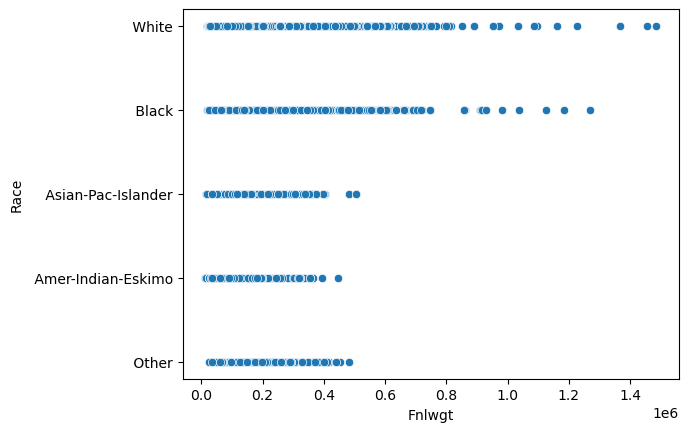

In [23]:
sns.scatterplot(y=df['Race'],x=df.Fnlwgt,palette='Set1')

<AxesSubplot:xlabel='Workclass', ylabel='count'>

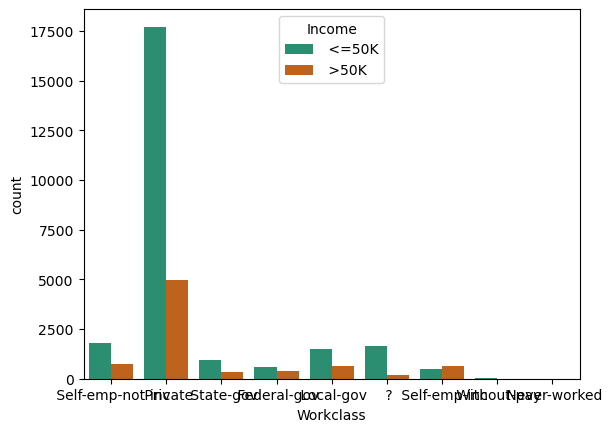

In [24]:
sns.countplot(hue=df.Income,x=df.Workclass,palette='Dark2')

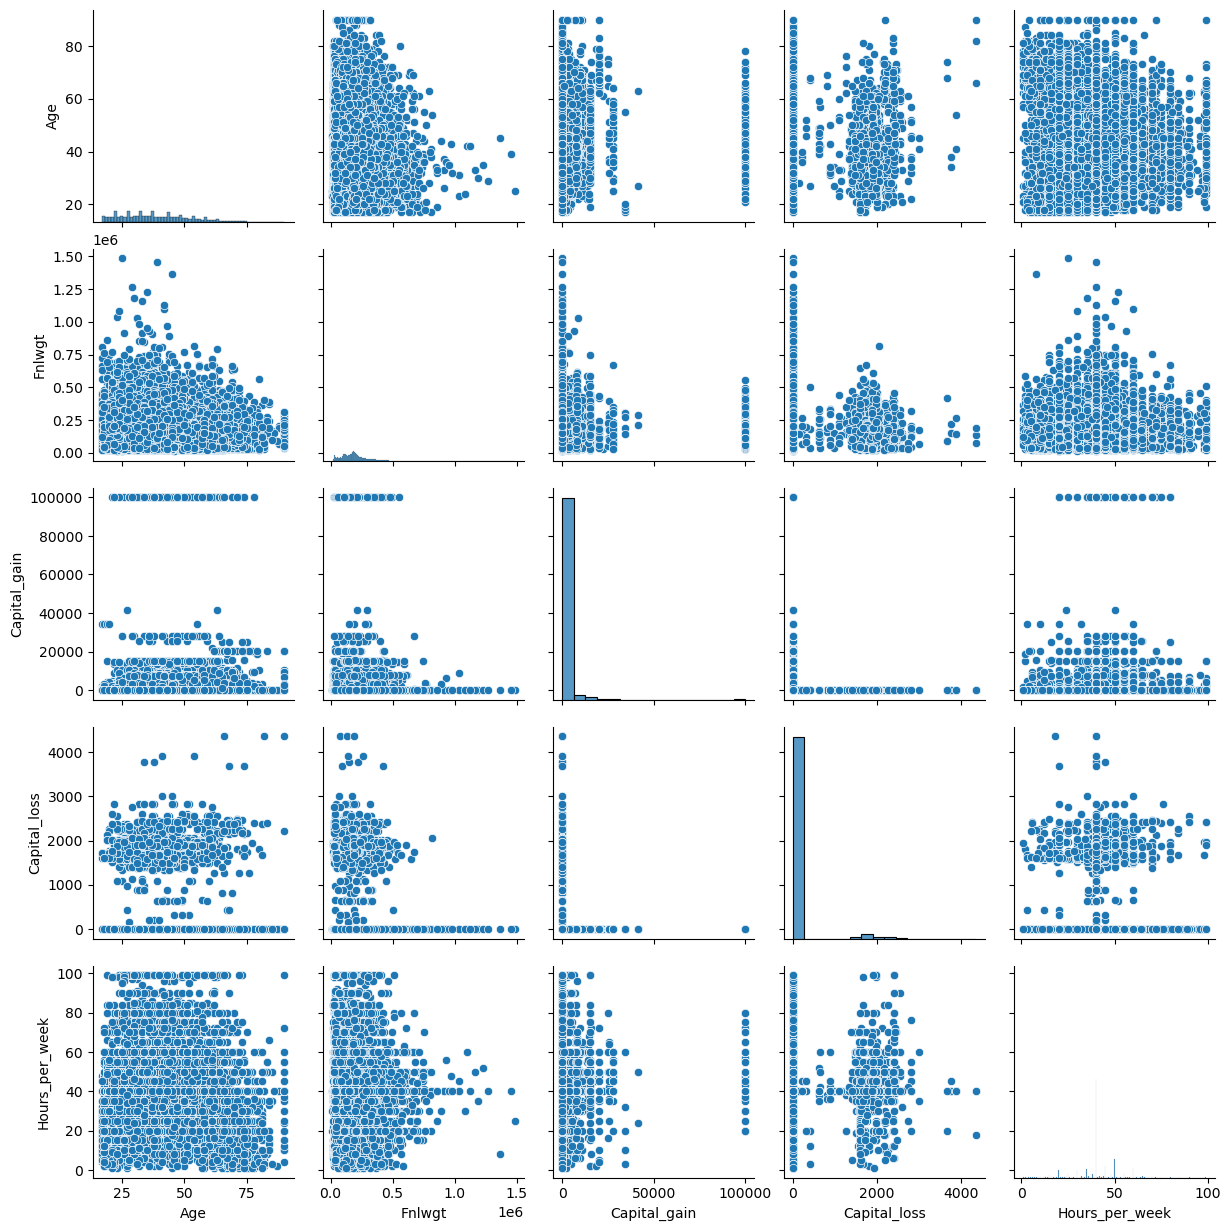

In [25]:
sns.pairplot(df)

# Outliers

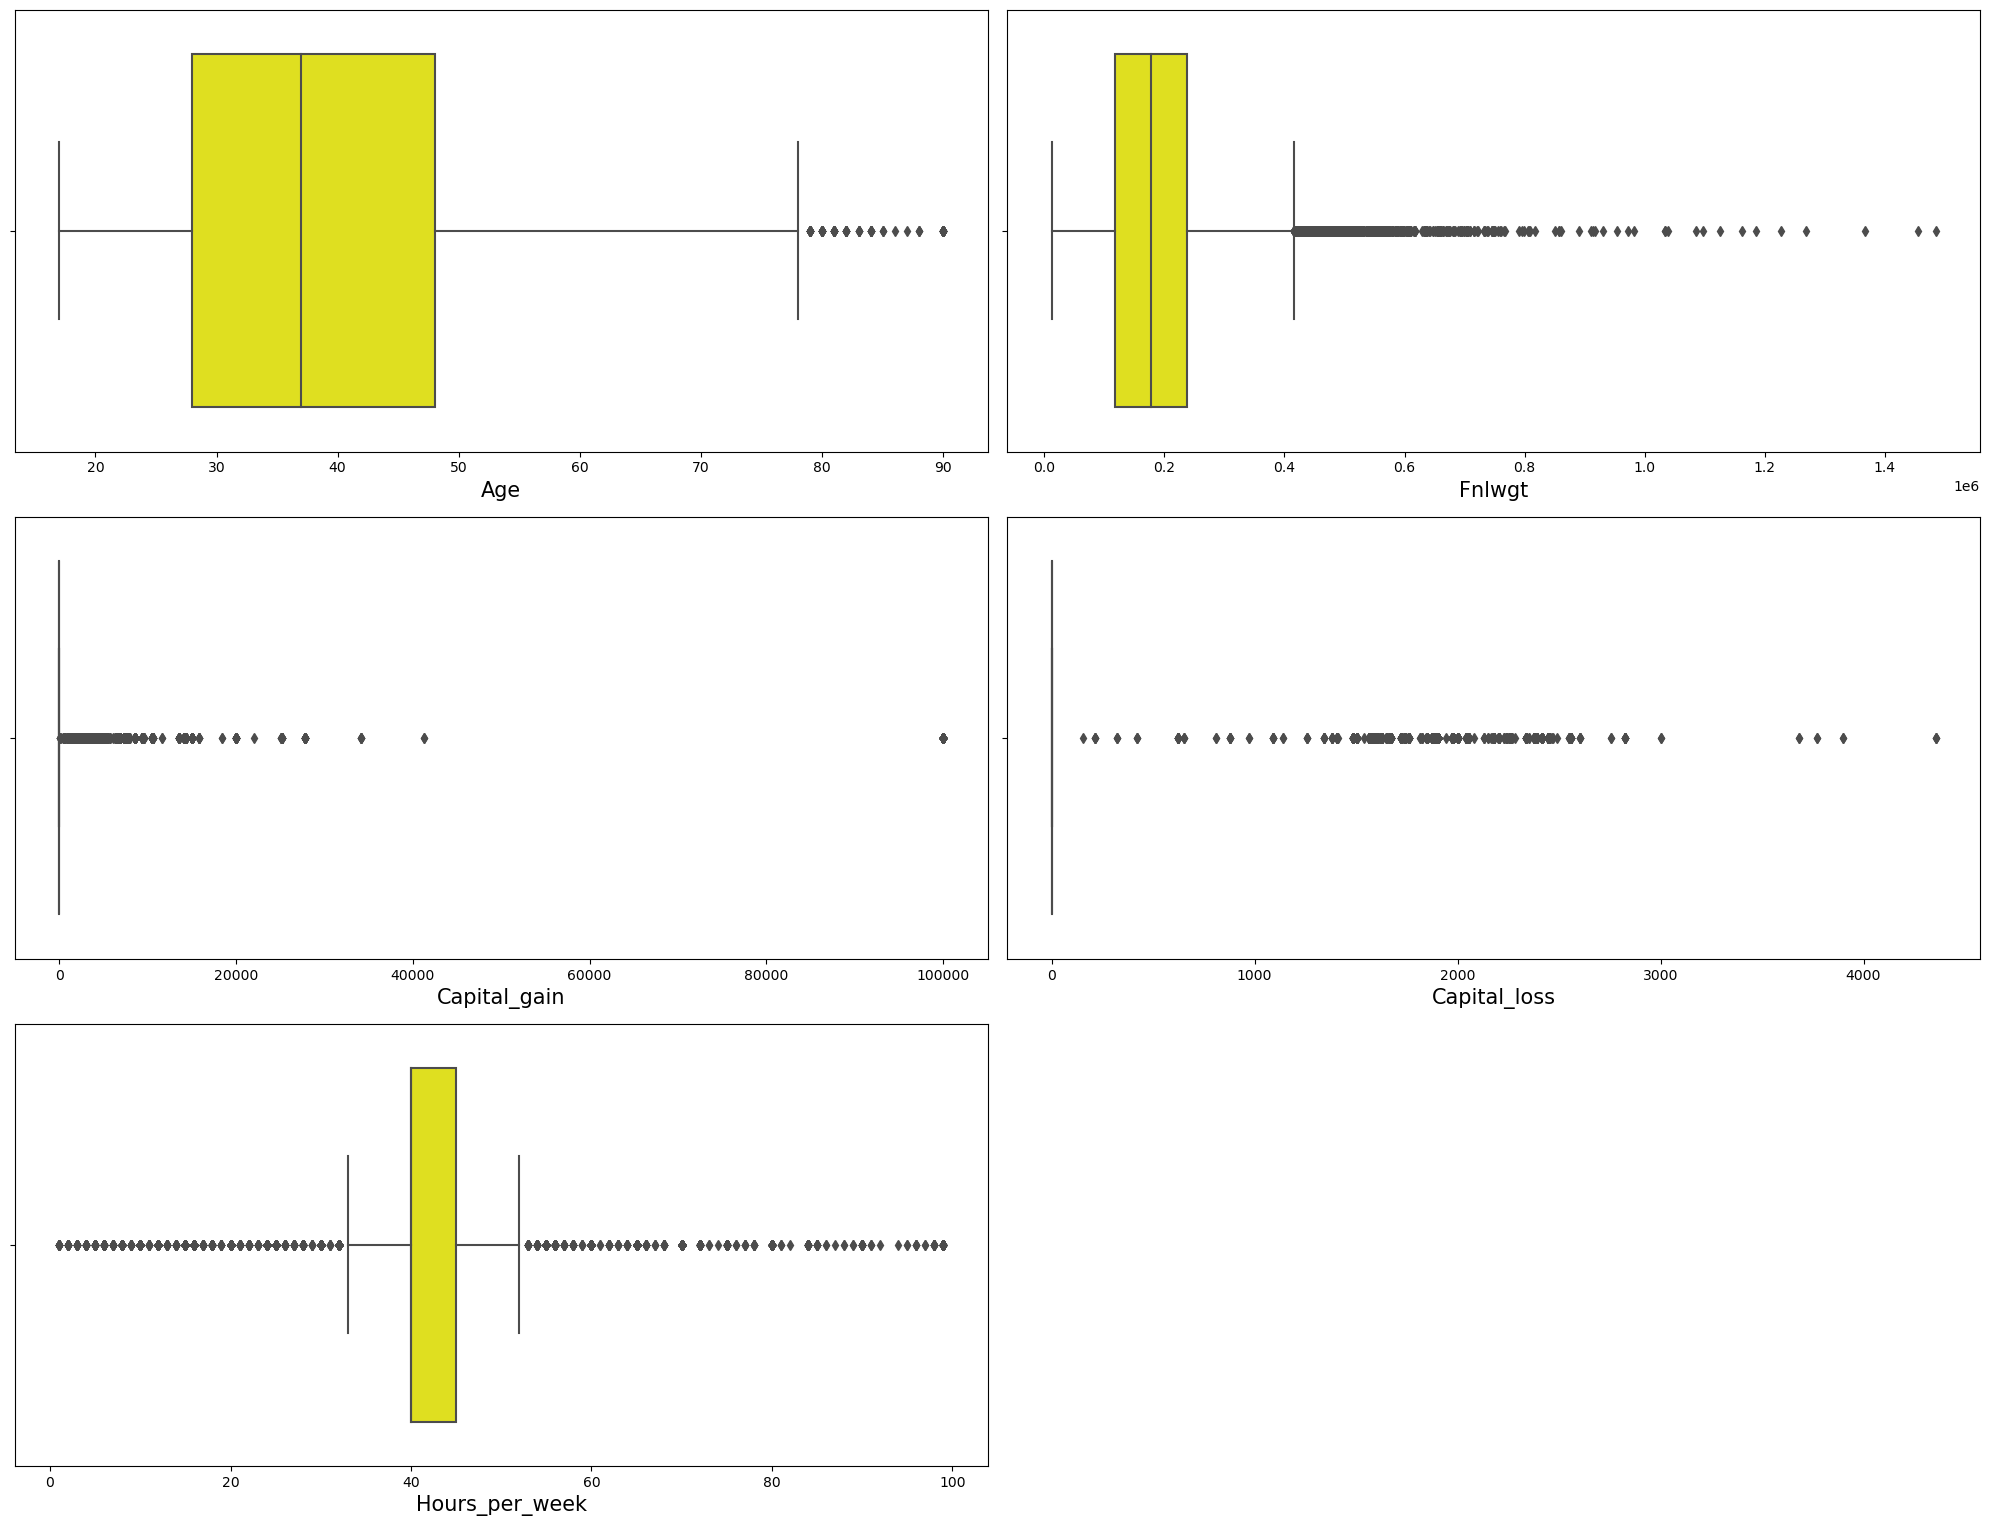

In [26]:
plt.figure(figsize=(20,25))
p=1
for i in num_col:
    if p<=10:
        plt.subplot(5,2,p)
        sns.boxplot(df[i],color='yellow')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

In [27]:
#Removing outliers
from scipy.stats import zscore
outliers=df[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]    #As all the numerical columns are having outliers
z=np.abs(zscore(outliers))
z

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
0,0.836961,1.008703,0.145969,0.216747,2.222450
1,0.042934,0.245008,0.145969,0.216747,0.035664
2,1.056935,0.425720,0.145969,0.216747,0.035664
3,0.776180,1.408036,0.145969,0.216747,0.035664
4,0.116259,0.898091,0.145969,0.216747,0.035664
...,...,...,...,...,...
32555,0.849505,0.639647,0.145969,0.216747,0.197648
32556,0.103715,0.335469,0.145969,0.216747,0.035664
32557,1.423558,0.358812,0.145969,0.216747,0.035664
32558,1.216128,0.110897,0.145969,0.216747,1.655506


In [28]:
threshold=3
print(np.where(z>3))

(array([    9,    22,    27, ..., 32500, 32500, 32506], dtype=int64), array([4, 3, 4, ..., 0, 4, 4], dtype=int64))


In [29]:
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Workclass,Fnlwgt,Education,Occupation,Relationship,Race,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,Exec-managerial,Husband,White,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,<=50K
2,53,Private,234721,11th,Handlers-cleaners,Husband,Black,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,Prof-specialty,Wife,Black,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,Exec-managerial,Wife,White,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,Tech-support,Wife,White,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,Machine-op-inspct,Husband,White,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,Adm-clerical,Unmarried,White,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,Adm-clerical,Own-child,White,0,0,20,United-States,<=50K


In [30]:
print("Data loss after removing outliers =",(df.shape[0]-df_new.shape[0])/df.shape[0]*100)

Data loss after removing outliers = 7.77600196705188


Data loss is only 7.77%, so we can proceed with the new dataset.

In [31]:
df=df_new
df

,Age,Workclass,Fnlwgt,Education,Occupation,Relationship,Race,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,Exec-managerial,Husband,White,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,<=50K
2,53,Private,234721,11th,Handlers-cleaners,Husband,Black,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,Prof-specialty,Wife,Black,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,Exec-managerial,Wife,White,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,Tech-support,Wife,White,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,Machine-op-inspct,Husband,White,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,Adm-clerical,Unmarried,White,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,Adm-clerical,Own-child,White,0,0,20,United-States,<=50K


In [32]:
print("The shape of new data set is",df.shape)

The shape of new data set is (30006, 12)


# Skewness

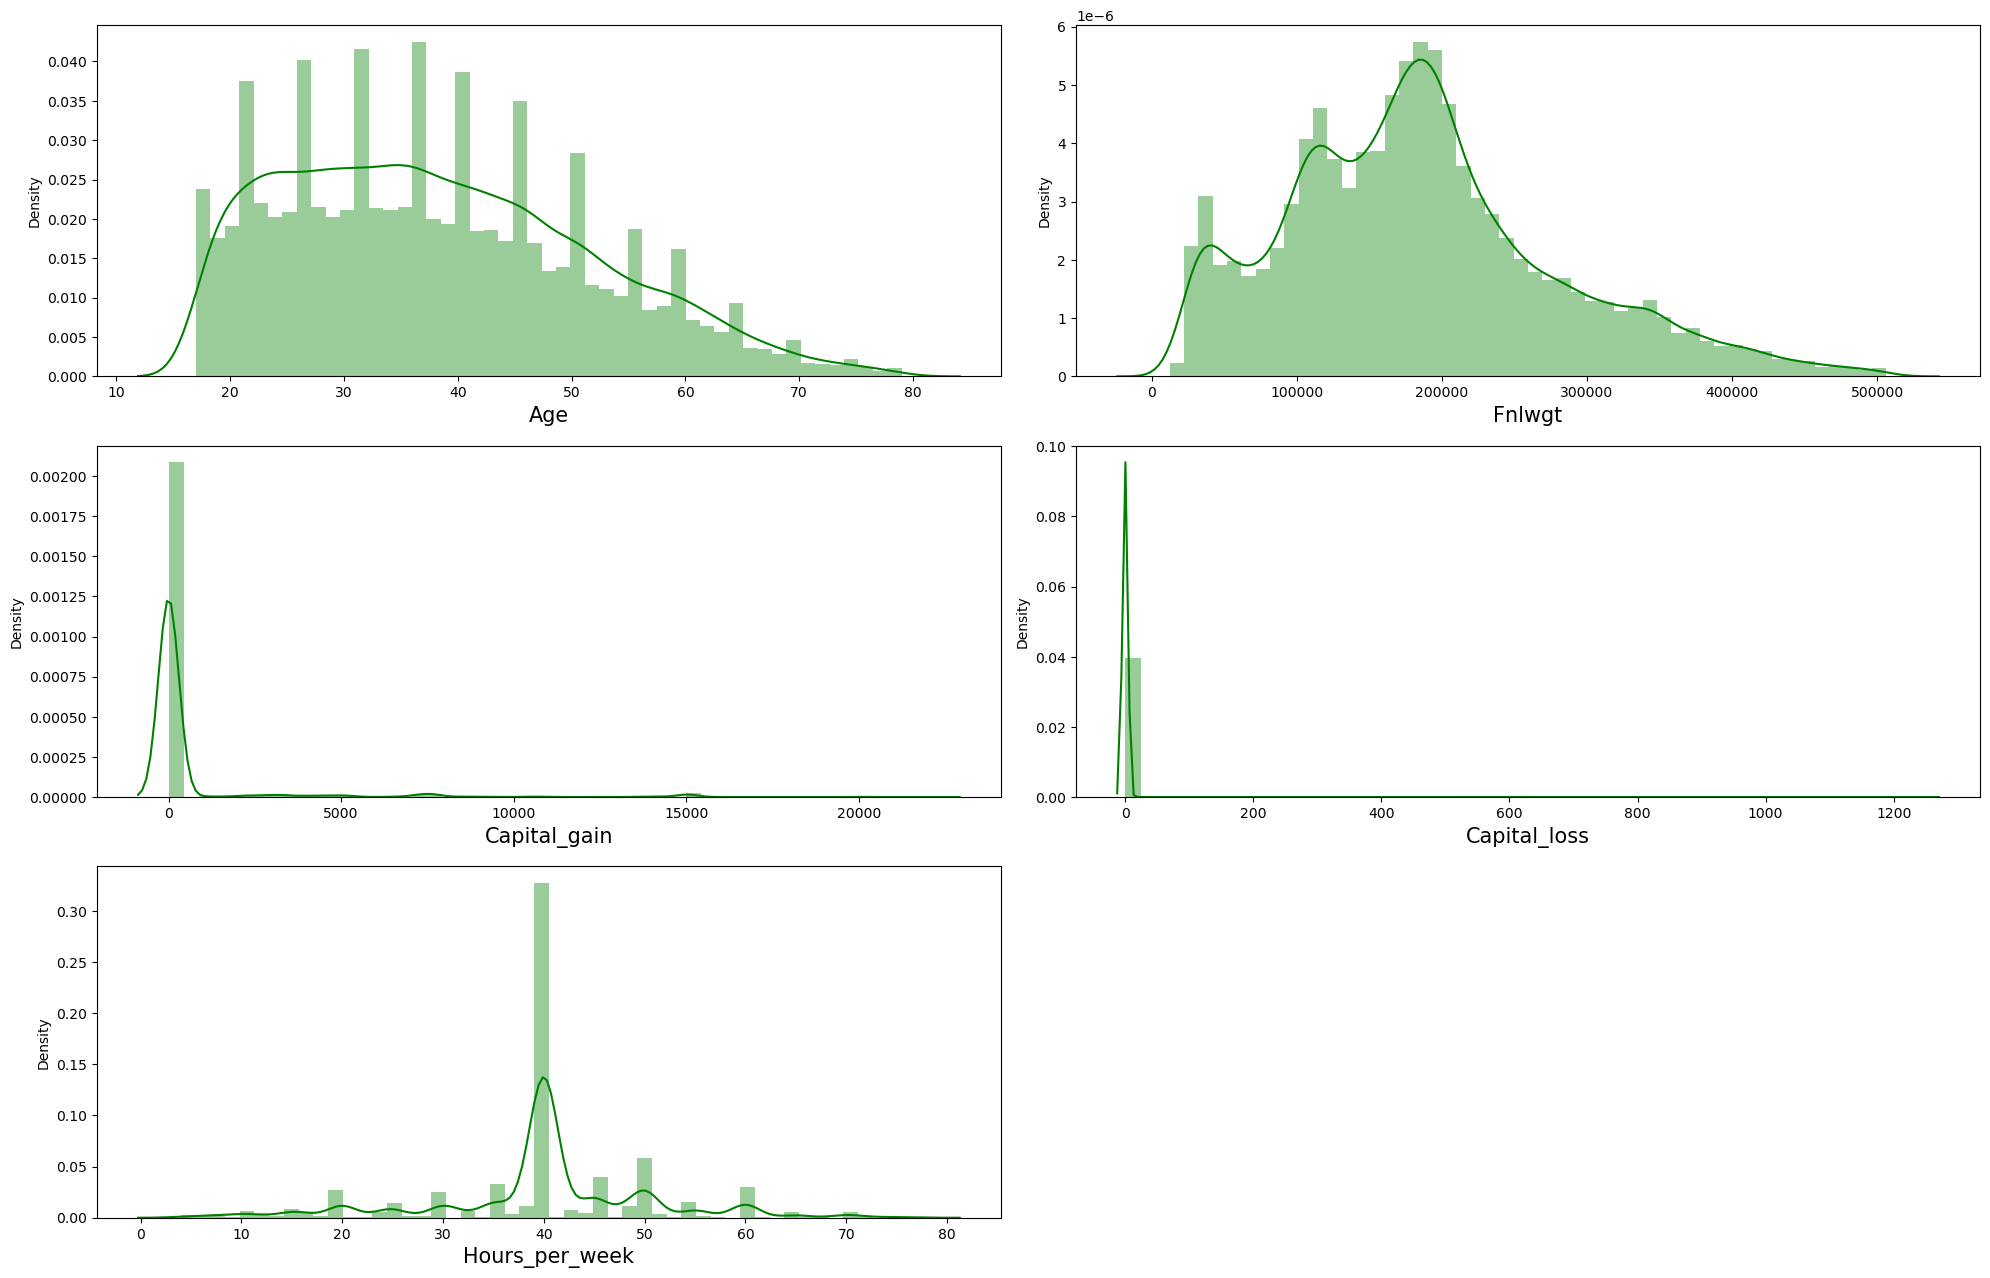

In [33]:
plt.figure(figsize=(20,25))
p=1
for i in num_col:
    if p<=12:
        plt.subplot(6,2,p)
        sns.distplot(df[i],color='green')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

Apart from 'Capital_gain' and 'Capital_loss' other columns are almost normally distributed.

In [34]:
#Removing skewness
from scipy.stats import boxcox
df['Capital_gain']=boxcox(df['Capital_gain'],1)
df['Capital_loss']=boxcox(df['Capital_loss'],1)

In [35]:
df.skew()

Age                0.489089
Fnlwgt             0.634650
Capital_gain       4.955914
Capital_loss      29.750401
Hours_per_week    -0.349780
dtype: float64

Now all the columns are normally distributed.

In [36]:
df

,Age,Workclass,Fnlwgt,Education,Occupation,Relationship,Race,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,Exec-managerial,Husband,White,-1.0,-1.0,13,United-States,<=50K
1,38,Private,215646,HS-grad,Handlers-cleaners,Not-in-family,White,-1.0,-1.0,40,United-States,<=50K
2,53,Private,234721,11th,Handlers-cleaners,Husband,Black,-1.0,-1.0,40,United-States,<=50K
3,28,Private,338409,Bachelors,Prof-specialty,Wife,Black,-1.0,-1.0,40,Cuba,<=50K
4,37,Private,284582,Masters,Exec-managerial,Wife,White,-1.0,-1.0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,Tech-support,Wife,White,-1.0,-1.0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,Machine-op-inspct,Husband,White,-1.0,-1.0,40,United-States,>50K
32557,58,Private,151910,HS-grad,Adm-clerical,Unmarried,White,-1.0,-1.0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,Adm-clerical,Own-child,White,-1.0,-1.0,20,United-States,<=50K


Although the dataset is normally distributed still ceratin columns are showing NaN values.

In [37]:
#checking null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Occupation        0
Relationship      0
Race              0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Here in the 'Capital_gain' and 'Capital_loss' columns most of the values are NaN, so lets drop these columns.

In [38]:
df.drop(['Capital_gain','Capital_loss'],axis=1,inplace=True)

In [39]:
df.head()

,Age,Workclass,Fnlwgt,Education,Occupation,Relationship,Race,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,Exec-managerial,Husband,White,13,United-States,<=50K
1,38,Private,215646,HS-grad,Handlers-cleaners,Not-in-family,White,40,United-States,<=50K
2,53,Private,234721,11th,Handlers-cleaners,Husband,Black,40,United-States,<=50K
3,28,Private,338409,Bachelors,Prof-specialty,Wife,Black,40,Cuba,<=50K
4,37,Private,284582,Masters,Exec-managerial,Wife,White,40,United-States,<=50K


<AxesSubplot:>

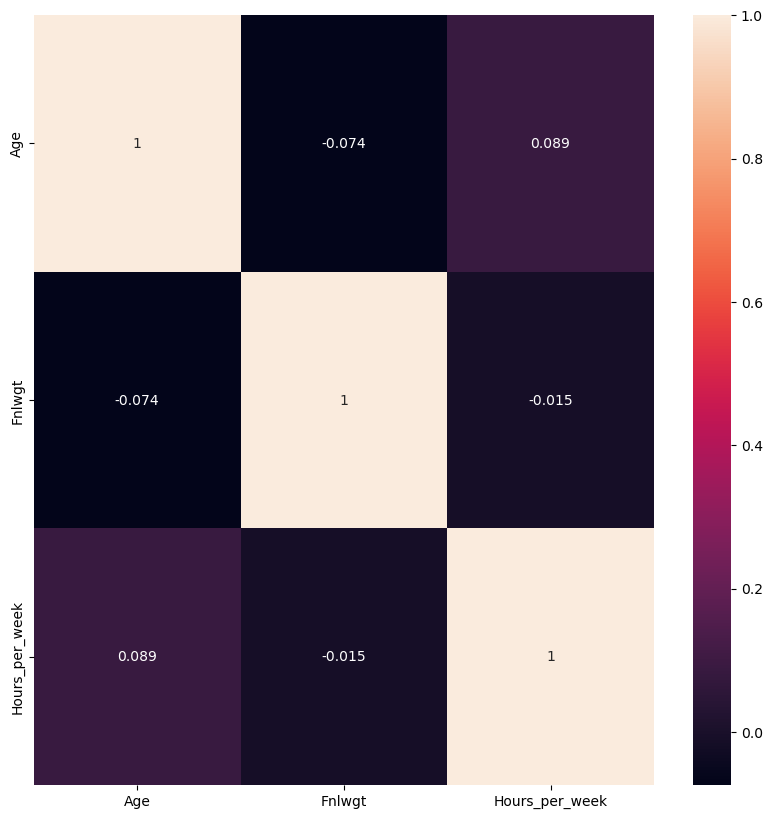

In [40]:
#Visualizing correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30006 entries, 0 to 32559
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             30006 non-null  int64 
 1   Workclass       30006 non-null  object
 2   Fnlwgt          30006 non-null  int64 
 3   Education       30006 non-null  object
 4   Occupation      30006 non-null  object
 5   Relationship    30006 non-null  object
 6   Race            30006 non-null  object
 7   Hours_per_week  30006 non-null  int64 
 8   Native_country  30006 non-null  object
 9   Income          30006 non-null  object
dtypes: int64(3), object(7)
memory usage: 2.5+ MB


# Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le=LabelEncoder()
list=df[['Workclass','Education','Occupation','Relationship','Race','Native_country','Income']]
for i in list:
    df[i]=le.fit_transform(df[i])
df

,Age,Workclass,Fnlwgt,Education,Occupation,Relationship,Race,Hours_per_week,Native_country,Income
0,50,6,83311,9,4,0,4,13,38,0
1,38,4,215646,11,6,1,4,40,38,0
2,53,4,234721,1,6,0,2,40,38,0
3,28,4,338409,9,10,5,2,40,5,0
4,37,4,284582,12,4,5,4,40,38,0
...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,13,5,4,38,38,0
32556,40,4,154374,11,7,0,4,40,38,1
32557,58,4,151910,11,1,4,4,40,38,0
32558,22,4,201490,11,1,3,4,20,38,0


In [44]:
#Separating target and feature variables
x=df.iloc[:,0:-1]
x.head()

,Age,Workclass,Fnlwgt,Education,Occupation,Relationship,Race,Hours_per_week,Native_country
0,50,6,83311,9,4,0,4,13,38
1,38,4,215646,11,6,1,4,40,38
2,53,4,234721,1,6,0,2,40,38
3,28,4,338409,9,10,5,2,40,5
4,37,4,284582,12,4,5,4,40,38


In [45]:
y=df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int32

# Multi-Collinearity

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
vif=pd.DataFrame()
vif['VIF_Values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF_Values,Features
0,8.468110,Age
1,8.412860,Workclass
2,4.480869,Fnlwgt
3,7.569657,Education
4,3.596458,Occupation
5,1.867423,Relationship
6,16.779022,Race
7,12.888397,Hours_per_week
8,18.683715,Native_country


There is multi-collinearity present, but as the dataset is having less data, we will consider this dataset, without removing the multi-collinearity

# Modelling

In [48]:
#importing necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [49]:
#finding the best random state
max_acc=0
max_rs=0
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    score=accuracy_score(y_test,pred)
    if score>max_acc:
        max_acc=score
        max_rs=i
print("Maximum accuracy at random_state",max_rs,"is",max_acc,".")

Maximum accuracy at random_state 365 is 0.784487982225813 .


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=max_rs)

In [51]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,lr_pred),"\n")
print("Classification Report\n",classification_report(y_test,lr_pred),"\n")
print("Confusion Matrix\n",confusion_matrix(y_test,lr_pred))

Accuracy Score = 0.784487982225813 

Classification Report
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      7768
           1       0.00      0.00      0.00      2134

    accuracy                           0.78      9902
   macro avg       0.39      0.50      0.44      9902
weighted avg       0.62      0.78      0.69      9902
 

Confusion Matrix
 [[7768    0]
 [2134    0]]


In [52]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,rfc_pred),"\n")
print("Classification Report\n",classification_report(y_test,rfc_pred),"\n")
print("Confusion Matrix\n",confusion_matrix(y_test,rfc_pred))

Accuracy Score = 0.8361947081397697 

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      7768
           1       0.65      0.53      0.58      2134

    accuracy                           0.84      9902
   macro avg       0.76      0.72      0.74      9902
weighted avg       0.83      0.84      0.83      9902
 

Confusion Matrix
 [[7151  617]
 [1005 1129]]


In [53]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,dtc_pred),"\n")
print("Classification Report\n",classification_report(y_test,dtc_pred),"\n")
print("Confusion Matrix\n",confusion_matrix(y_test,dtc_pred))

Accuracy Score = 0.7866087659058776 

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      7768
           1       0.50      0.53      0.52      2134

    accuracy                           0.79      9902
   macro avg       0.69      0.70      0.69      9902
weighted avg       0.79      0.79      0.79      9902
 

Confusion Matrix
 [[6648 1120]
 [ 993 1141]]


In [54]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb_pred=gnb.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,gnb_pred),"\n")
print("Classification Report\n",classification_report(y_test,gnb_pred),"\n")
print("Confusion Matrix\n",confusion_matrix(y_test,gnb_pred))

Accuracy Score = 0.790143405372652 

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.96      0.88      7768
           1       0.55      0.15      0.24      2134

    accuracy                           0.79      9902
   macro avg       0.68      0.56      0.56      9902
weighted avg       0.75      0.79      0.74      9902
 

Confusion Matrix
 [[7496  272]
 [1806  328]]


In [55]:
sv=SVC()
sv.fit(x_train,y_train)
sv_pred=sv.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,sv_pred),"\n")
print("Classification Report\n",classification_report(y_test,sv_pred),"\n")
print("Confusion Matrix\n",confusion_matrix(y_test,sv_pred))

Accuracy Score = 0.784487982225813 

Classification Report
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      7768
           1       0.00      0.00      0.00      2134

    accuracy                           0.78      9902
   macro avg       0.39      0.50      0.44      9902
weighted avg       0.62      0.78      0.69      9902
 

Confusion Matrix
 [[7768    0]
 [2134    0]]


# Cross_Validation

In [56]:
from sklearn.model_selection import cross_val_score

In [58]:
dtc_score=cross_val_score(dtc,x,y,cv=22)
print(dtc_score)
print(dtc_score.mean())
print("The difference between accuracy score and cv score is",(accuracy_score(y_test,dtc_pred))-(dtc_score.mean()))

[0.771261   0.78225806 0.77199413 0.77932551 0.7771261  0.77859238
 0.76686217 0.76539589 0.7829912  0.75953079 0.78152493 0.76466276
 0.7771261  0.78519062 0.77859238 0.77565982 0.80131965 0.78958944
 0.78665689 0.78665689 0.77916361 0.77622891]
0.7780776923659194
The difference between accuracy score and cv score is 0.00853107353995819


In [59]:
rfc_score=cross_val_score(rfc,x,y,cv=22)
print(rfc_score)
print(rfc_score.mean())
print("The difference between accuracy score and cv score is",(accuracy_score(y_test,rfc_pred))-(rfc_score.mean()))

[0.8255132  0.82771261 0.82624633 0.8372434  0.82624633 0.83211144
 0.82697947 0.82771261 0.84017595 0.83357771 0.83870968 0.82917889
 0.83064516 0.84017595 0.8431085  0.8372434  0.83870968 0.83064516
 0.84530792 0.83577713 0.83639032 0.83345561]
0.8337666570890462
The difference between accuracy score and cv score is 0.002428051050723523


In [60]:
lr_score=cross_val_score(lr,x,y,cv=22)
print(lr_score)
print(lr_score.mean())
print("The difference between accuracy score and cv score is",(accuracy_score(y_test,lr_pred))-(lr_score.mean()))

[0.76173021 0.75879765 0.7558651  0.75806452 0.76612903 0.76026393
 0.77859238 0.75659824 0.75806452 0.75806452 0.75733138 0.75806452
 0.75733138 0.75733138 0.77785924 0.76319648 0.77785924 0.77785924
 0.76099707 0.75806452 0.76595745 0.76008804]
0.762914091091972
The difference between accuracy score and cv score is 0.021573891133841006


In [61]:
sv_score=cross_val_score(sv,x,y,cv=22)
print(sv_score)
print(sv_score.mean())
print("The difference between accuracy score and cv score is",(accuracy_score(y_test,sv_pred))-(sv_score.mean()))

[0.77859238 0.77859238 0.77859238 0.77859238 0.77859238 0.77859238
 0.77859238 0.77785924 0.77785924 0.77785924 0.77785924 0.77785924
 0.77785924 0.77785924 0.77785924 0.77785924 0.77785924 0.77785924
 0.77785924 0.77785924 0.77842993 0.77842993]
0.7781443901582222
The difference between accuracy score and cv score is 0.00634359206759072


# Hyper_Parameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
model=RandomForestClassifier()
parameters={'n_estimators':[100,120,130,200,158,968,458],'criterion':['gini','entropy','log_loss']}
grid=GridSearchCV(estimator=model, param_grid=parameters)
grid.fit(x,y)
print("GRID :",grid)
print("SCORE =",grid.best_score_)
print("PARAMS =",grid.best_params_)

GRID : GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [100, 120, 130, 200, 158, 968, 458]})
SCORE = 0.8358995038092341
PARAMS = {'criterion': 'entropy', 'n_estimators': 968}


In [70]:
rfc=RandomForestClassifier(n_estimators=968,criterion='entropy')
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,pred))

Accuracy Score = 0.8369016360331246


In [66]:
model=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy','log_loss'],'splitter':['best','random']}
grid=GridSearchCV(estimator=model,param_grid=parameters)
grid.fit(x,y)
print("GRID :",grid,"\n")
print("SCORE =",grid.best_score_)
print("PARAMS =",grid.best_params_)

GRID : GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']}) 

SCORE = 0.7813105568709781
PARAMS = {'criterion': 'entropy', 'splitter': 'best'}


In [67]:
#Applying the parameter
dtc=DecisionTreeClassifier(criterion='entropy',splitter='best')
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,pred))

Accuracy Score = 0.7894364774792971


As RandomForestClassifier is giving accuracy so this is our final model.

In [71]:
final_model=rfc
final_model

RandomForestClassifier(criterion='entropy', n_estimators=968)

# Saving and predicting

In [83]:
import joblib
joblib.dump(final_model,"Census_Income.pkl")

['Census_Income.pkl']

In [84]:
model=joblib.load("Census_Income.pkl")
prediction=model.predict(x_test)
prediction

array([0, 0, 0, ..., 1, 0, 0])

In [85]:
actual=np.array(y_test)
actual

array([0, 0, 0, ..., 1, 0, 0])

In [86]:
ds=pd.DataFrame()
ds['Actual_Value']=actual
ds['Predicted_Value']=prediction
ds

,Actual_Value,Predicted_Value
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
9897,1,1
9898,0,0
9899,1,1
9900,0,0


Our model is performing good.